In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## US Exploratory Data Analysis, Cleaning, and Processing

In [4]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)
#df.head()

In [5]:
def analyze_df(df, head_rows=5):
    print(f"1. First {head_rows} rows of data:\n")
    display(df.head())

    print(f"\n 2. Data Info:\n")
    display(df.info())

    print(f"\n 3. Description of Data:\n")
    display(df.describe().transpose())

    print(f" 4. Missing Values: \n")
    missing_values = df.isnull().sum()
    display(missing_values)

In [6]:
analyze_df(confirmed_df, head_rows=5)

1. First 5 rows of data:



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704



 2. Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1154 entries, UID to 3/9/23
dtypes: float64(3), int64(1145), object(6)
memory usage: 29.4+ MB


None


 3. Description of Data:



,count,mean,std,min,25%,50%,75%,max
UID,3342.0,8.342992e+07,4.314076e+06,16.0000,8.401811e+07,8.402921e+07,8.404612e+07,8.410000e+07
code3,3342.0,8.344949e+02,3.648738e+01,16.0000,8.400000e+02,8.400000e+02,8.400000e+02,8.500000e+02
FIPS,3332.0,3.304308e+04,1.864881e+04,60.0000,1.907650e+04,3.101200e+04,4.712950e+04,9.999900e+04
Lat,3342.0,3.672162e+01,9.079322e+00,-14.2710,3.389680e+01,3.800561e+01,4.157926e+01,6.931479e+01
Long_,3342.0,-8.864205e+01,2.177629e+01,-174.1596,-9.780360e+01,-8.948886e+01,-8.231340e+01,1.456739e+02
...,...,...,...,...,...,...,...,...
3/5/23,3342.0,3.101346e+04,1.083090e+05,0.0000,2.920250e+03,7.724500e+03,2.031275e+04,3.705381e+06
3/6/23,3342.0,3.101602e+04,1.083152e+05,0.0000,2.920250e+03,7.724500e+03,2.031950e+04,3.705381e+06
3/7/23,3342.0,3.102660e+04,1.083322e+05,0.0000,2.923000e+03,7.735500e+03,2.033450e+04,3.705381e+06
3/8/23,3342.0,3.104601e+04,1.083601e+05,0.0000,2.917500e+03,7.735500e+03,2.034500e+04,3.705381e+06


 4. Missing Values: 



UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Length: 1154, dtype: int64

In [7]:
# handle missing values

# confirmed
c_null_columns = confirmed_df.isnull().any()
display(print(f'{c_null_columns[:15]}'))

# deaths
d_null_columns = deaths_df.isnull().any()
display(print(f'\n\n {d_null_columns[:15]}'))

confirmed_df.dropna()
deaths_df.dropna()

# FIPS (10 nans) and Admin2 (6 nans), well just drop them for now

UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Province_State    False
Country_Region    False
Lat               False
Long_             False
Combined_Key      False
1/22/20           False
1/23/20           False
1/24/20           False
1/25/20           False
dtype: bool


None



 UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Province_State    False
Country_Region    False
Lat               False
Long_             False
Combined_Key      False
Population        False
1/22/20           False
1/23/20           False
1/24/20           False
dtype: bool


None

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,16,16,16,16,16,16,16,16,16,16
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,43,43,43,43,43,43,43,43,43,43
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,50,50,50,50,50,50,50,51,51,51


In [8]:
# massage dataframe so that date columns are now rows and create num of Cases and Date columns

id_vars_c = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
           'Country_Region', 'Lat', 'Long_', 'Combined_Key']	
df_c = confirmed_df.melt(id_vars=id_vars_c, var_name='Date', value_name='Cases')
display(df_c.head())

id_vars_d = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
           'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
df_d = deaths_df.melt(id_vars=id_vars_d, var_name='Date', value_name='Deaths')
display(df_d.head())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,1/22/20,0


In [9]:
# merge confirmed cases and deaths cases into one dataframe. confirm we have no duplicated 

merged_df = pd.merge(df_c, df_d[['UID', 'Date', 'Population', 'Deaths']], on=['UID', 'Date'], how='outer')
merged_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases,Population,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/21,0,55641,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/22,11,55641,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/23,8266,55641,34
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/10/21,0,55641,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/10/22,18,55641,0


In [10]:
# confirm we have no duplicates

duplicates = merged_df.duplicated().sum()
if duplicates:
    merged_df.drop_duplicates()
    print(f'{duplicates} duplicate rows dropped!')
else:
    print('OH YEAH NO DUPES')

OH YEAH NO DUPES


In [11]:
# corr_matrix = merged_df.corr(numeric_only=True)
# sns.clustermap(corr_matrix,
#               annot=True,
#               fmt='.2f',
#               figsize=(7,7),
#               cmap='coolwarm')

# strong positive correlation between (cases and deaths), (Population and Cases), (deaths and population)! 

## Begin Time Series Analysis (one month rn, for a specific location)

In [13]:
# change date column to datetime object
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y', errors='coerce')

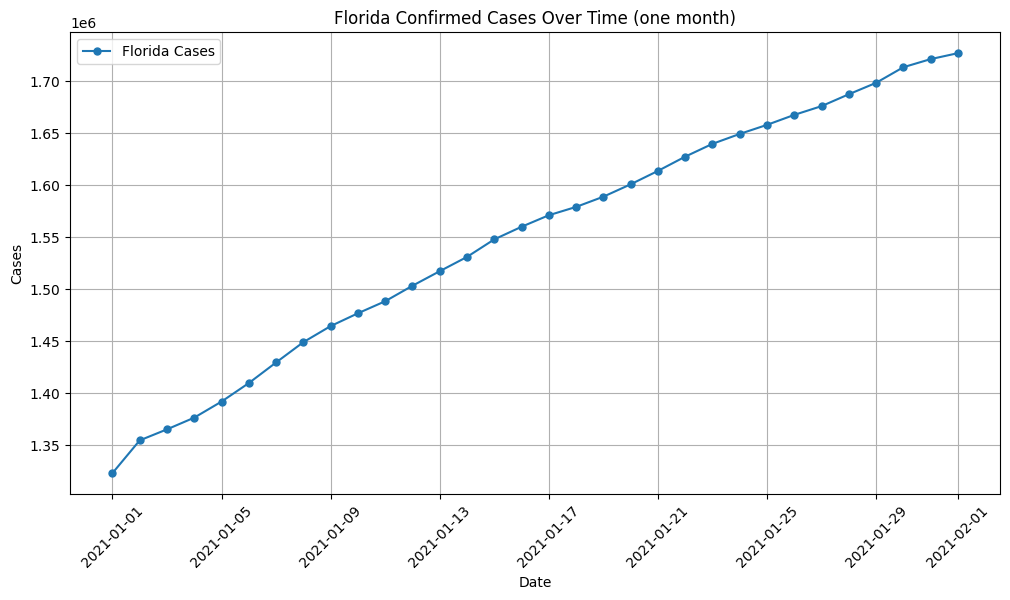

In [31]:
select_locs = ['Florida']
# filter dataframe to plotcause she too big rn
filtered_df = merged_df[(merged_df['Date'] >= '2021-01-01') & 
                        (merged_df['Date'] <= '2021-02-01') & 
                        (merged_df['Province_State'].isin(select_locs))]

# aggregate cases by date (sum if multiple entries exist)
grouped_df = filtered_df.groupby('Date', as_index=False)['Cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Date'], grouped_df['Cases'], marker='o', markersize=5, linestyle='-', label='Florida Cases')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Florida Confirmed Cases Over Time (one month)')

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
unique_places = merged_df['Province_State'].unique().tolist()
print(unique_places)